In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
#Cargar datos de archivo "kagglecatsanddogs_5340.zip"
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

In [2]:
#Imprimir los metadatos para revisarlos
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='C:\\Users\\79449\\tensorflow_datasets\\cats_vs_dogs\\4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) a

image  label
0  [[[242, 248, 248], [240, 246, 246], [235, 239,...      1
1  [[[215, 165, 114], [187, 135, 85], [232, 176, ...      1
2  [[[177, 183, 157], [185, 191, 165], [192, 198,...      1
3  [[[92, 66, 7], [93, 67, 8], [93, 67, 8], [93, ...      0
4  [[[140, 138, 141], [140, 138, 141], [141, 139,...      1
5  [[[126, 128, 125], [114, 116, 111], [97, 98, 9...      1
6  [[[40, 46, 70], [33, 38, 57], [30, 34, 59], [3...      0
7  [[[17, 11, 25], [26, 20, 34], [43, 36, 52], [6...      0
8  [[[81, 78, 71], [65, 62, 55], [49, 46, 39], [4...      1
9  [[[40, 40, 40], [40, 40, 40], [40, 40, 40], [4...      1
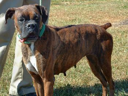
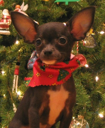
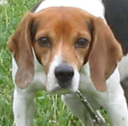
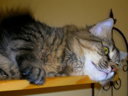
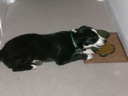
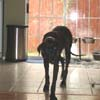
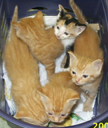
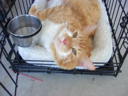
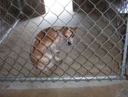
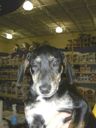

In [5]:
#Mostrar un ejemplo de los datos de entremiento del dataset
tfds.as_dataframe(datos['train'].take(10), metadatos)

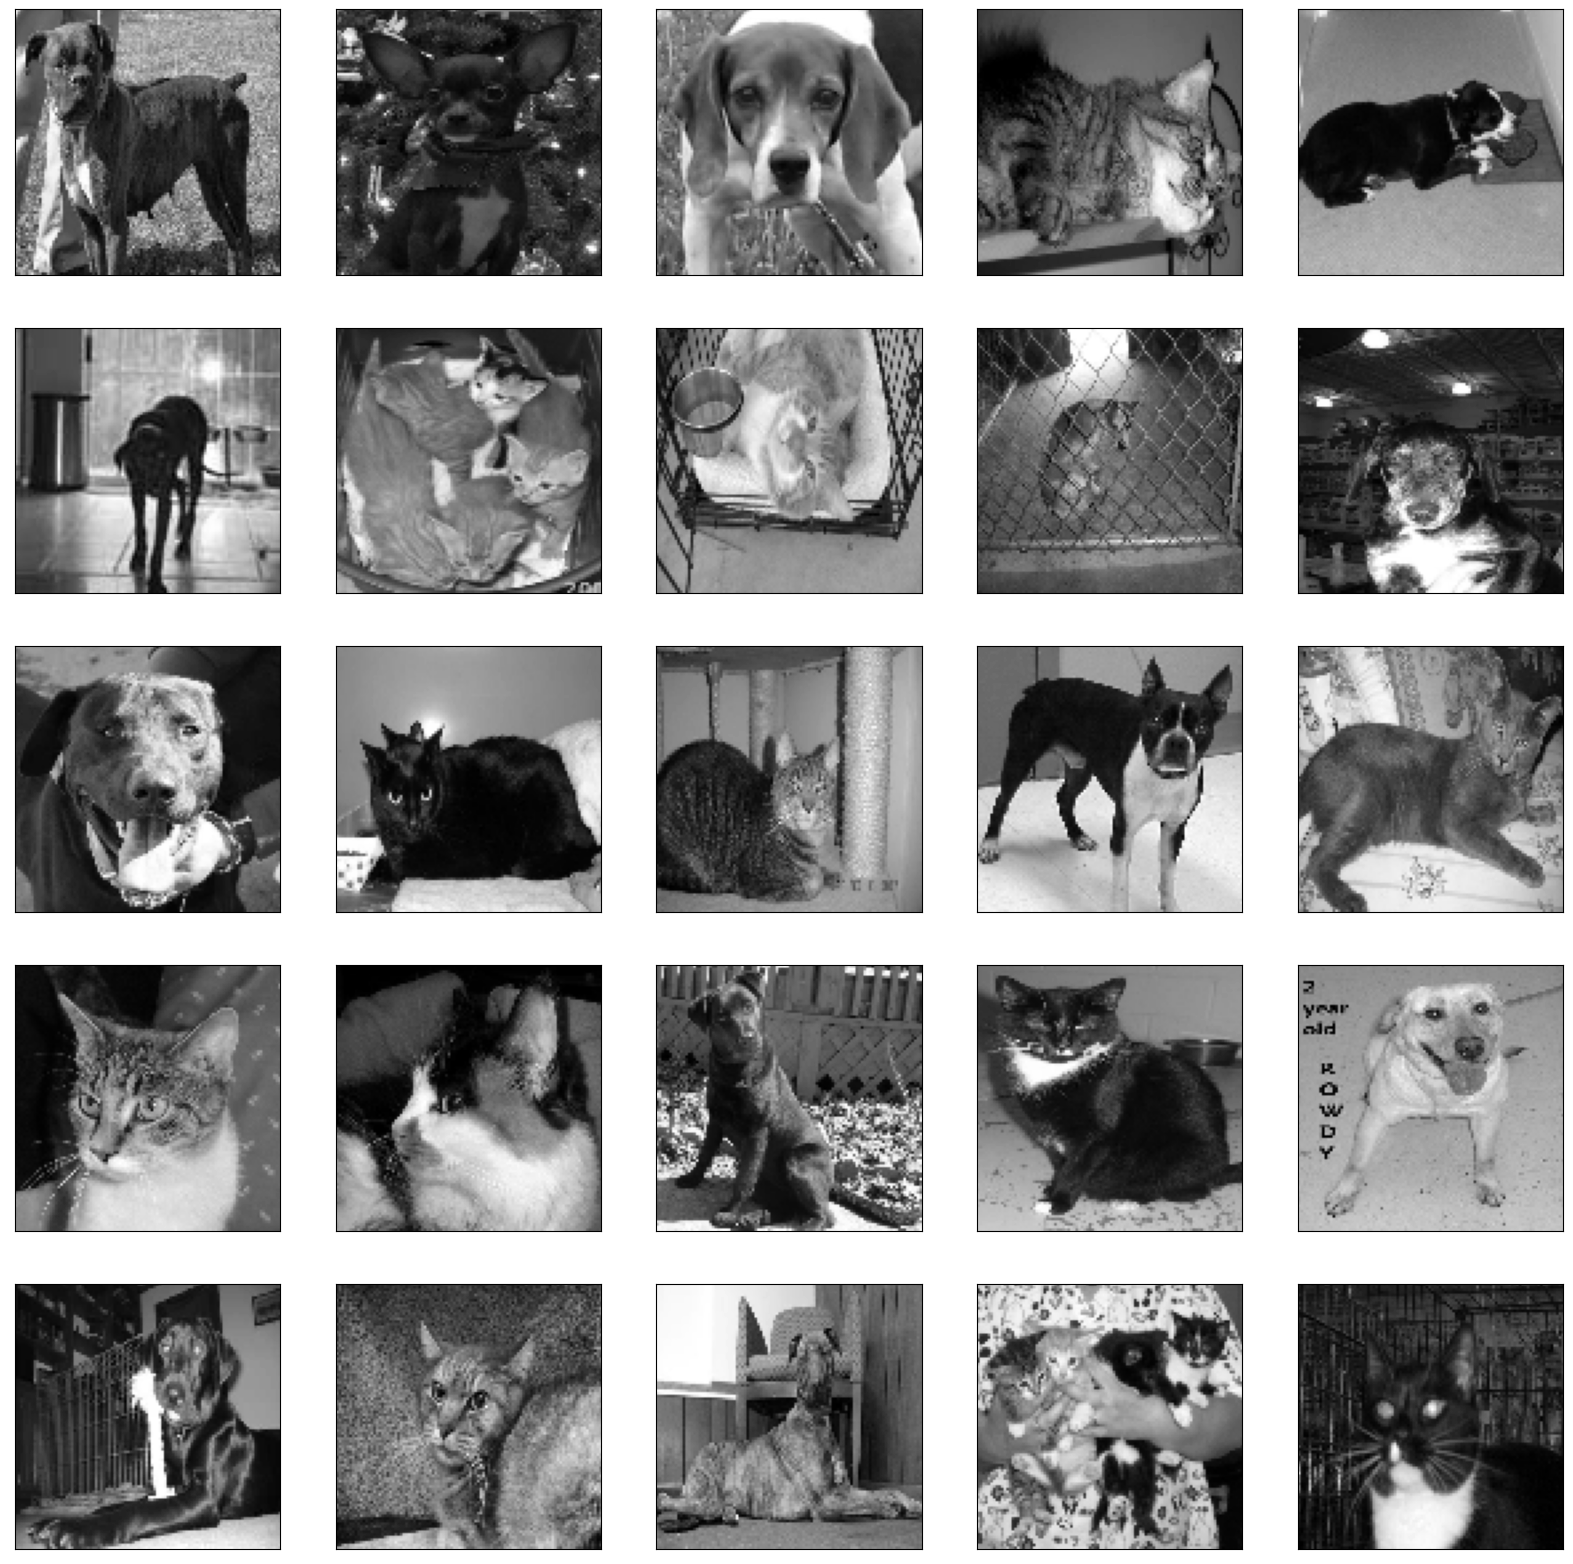

In [6]:
#Lo pasamos a TAMANO_IMG (100x100) y lo convertimos a blanco y negro *(solo para visualizar)*
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [7]:
#Creamos la variable que contendra todos los pares de los datos (imagen y etiqueta) ya modificados (blanco y negro, 100x100)
datos_entrenamiento = []

In [8]:
#Guardamos las imagenes en un tamaño de TAMANO_IMG (100x100) y lo convertimos a blanco y negro
for i, (imagen, etiqueta) in enumerate(datos['train']): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1
  datos_entrenamiento.append([imagen, etiqueta]) #guardamos en la nueva variable creada anteriormente.

In [9]:
#Ver los datos del primer indice (primera imagen y etiqueta)
datos_entrenamiento[0]

[array([[[242],
         [190],
         [105],
         ...,
         [189],
         [195],
         [143]],
 
        [[230],
         [130],
         [ 88],
         ...,
         [188],
         [179],
         [187]],
 
        [[170],
         [ 93],
         [ 84],
         ...,
         [131],
         [158],
         [168]],
 
        ...,
 
        [[112],
         [173],
         [164],
         ...,
         [141],
         [152],
         [119]],
 
        [[140],
         [151],
         [172],
         ...,
         [ 96],
         [150],
         [152]],
 
        [[ 92],
         [112],
         [168],
         ...,
         [ 44],
         [ 52],
         [ 47]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [10]:
#Ver cuantos datos tengo en la variable
len(datos_entrenamiento)

23262

In [11]:
#separamos datos
#Preparar mis variables X (entradas) y y (etiquetas) separadas
X = [] #imagenes de entrada (pixeles / fotos)
y = [] #etiquetas (perro o gato / indice)

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [12]:
#imagenes
X

[array([[[242],
         [190],
         [105],
         ...,
         [189],
         [195],
         [143]],
 
        [[230],
         [130],
         [ 88],
         ...,
         [188],
         [179],
         [187]],
 
        [[170],
         [ 93],
         [ 84],
         ...,
         [131],
         [158],
         [168]],
 
        ...,
 
        [[112],
         [173],
         [164],
         ...,
         [141],
         [152],
         [119]],
 
        [[140],
         [151],
         [172],
         ...,
         [ 96],
         [150],
         [152]],
 
        [[ 92],
         [112],
         [168],
         ...,
         [ 44],
         [ 52],
         [ 47]]], dtype=uint8),
 array([[[146],
         [115],
         [ 92],
         ...,
         [103],
         [ 72],
         [ 82]],
 
        [[128],
         [ 65],
         [ 77],
         ...,
         [128],
         [ 70],
         [ 97]],
 
        [[ 82],
         [ 66],
         [ 57],
         ...,
      

In [13]:
#Normalizar los datos de las X (imagenes). Se pasan a numero flotante y dividen entre 255 para quedar de 0-1 en lugar de 0-255
#Para poder entrenar de manera optima
import numpy as np

X = np.array(X).astype(float) / 255

In [14]:
X

array([[[[0.94901961],
         [0.74509804],
         [0.41176471],
         ...,
         [0.74117647],
         [0.76470588],
         [0.56078431]],

        [[0.90196078],
         [0.50980392],
         [0.34509804],
         ...,
         [0.7372549 ],
         [0.70196078],
         [0.73333333]],

        [[0.66666667],
         [0.36470588],
         [0.32941176],
         ...,
         [0.51372549],
         [0.61960784],
         [0.65882353]],

        ...,

        [[0.43921569],
         [0.67843137],
         [0.64313725],
         ...,
         [0.55294118],
         [0.59607843],
         [0.46666667]],

        [[0.54901961],
         [0.59215686],
         [0.6745098 ],
         ...,
         [0.37647059],
         [0.58823529],
         [0.59607843]],

        [[0.36078431],
         [0.43921569],
         [0.65882353],
         ...,
         [0.17254902],
         [0.20392157],
         [0.18431373]]],


       [[[0.57254902],
         [0.45098039],
         [0.36

In [15]:
#indices en formato tensor
y

[<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64

In [16]:
#Convertir etiquetas en arreglo simple
y = np.array(y)

In [17]:
#Datos tipo array de numpy
y

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [18]:
#Los tamaños de "X" y "y"
print(X.shape)
print(y.shape)

(23262, 100, 100, 1)
(23262,)


In [19]:
#Crear los modelos iniciales
#Usan sigmoid como salida (en lugar de softmax) para mostrar como podria funcionar con dicha funcion de activacion.
#Sigmoid regresa siempre datos entre 0 y 1. Realizamos el entrenamiento para al final considerar que si la respuesta se
#acerca a 0, es un gato, y si se acerca a 1, es un perro.

modeloDenso = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
#Compilar modelos. Usar crossentropy binario ya que tenemos solo 2 opciones (perro o gato)
modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import TensorBoard

In [22]:
#La variable de tensorboard se envia en el arreglo de "callbacks" (hay otros tipos de callbacks soportados)
#En este caso guarda datos en la carpeta indicada en cada epoca, de manera que despues
#Tensorboard los lee para hacer graficas
tensorboardDenso = TensorBoard(log_dir='logs/denso')
modeloDenso.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=30,
                callbacks=[tensorboardDenso])

Epoch 1/30
618/618 [==============================] - 9s 13ms/step - loss: 0.7133 - accuracy: 0.5408 - val_loss: 0.6738 - val_accuracy: 0.5825
Epoch 2/30
618/618 [==============================] - 8s 12ms/step - loss: 0.6755 - accuracy: 0.5756 - val_loss: 0.6757 - val_accuracy: 0.5897
Epoch 3/30
618/618 [==============================] - 8s 13ms/step - loss: 0.6667 - accuracy: 0.5939 - val_loss: 0.6708 - val_accuracy: 0.5914
Epoch 4/30
618/618 [==============================] - 8s 12ms/step - loss: 0.6702 - accuracy: 0.5820 - val_loss: 0.6701 - val_accuracy: 0.5940
Epoch 5/30
618/618 [==============================] - 8s 13ms/step - loss: 0.6630 - accuracy: 0.5971 - val_loss: 0.6686 - val_accuracy: 0.5968
Epoch 6/30
618/618 [==============================] - 8s 12ms/step - loss: 0.6637 - accuracy: 0.6001 - val_loss: 0.6940 - val_accuracy: 0.5562
Epoch 7/30
618/618 [==============================] - 8s 12ms/step - loss: 0.6598 - accuracy: 0.6039 - val_loss: 0.6662 - val_accuracy: 0.5954

In [23]:
tensorboardCNN = TensorBoard(log_dir='logs/cnn')
modeloCNN.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=30,
                callbacks=[tensorboardCNN])

Epoch 1/30
618/618 [==============================] - 78s 125ms/step - loss: 0.6314 - accuracy: 0.6308 - val_loss: 0.5563 - val_accuracy: 0.7140
Epoch 2/30
618/618 [==============================] - 76s 122ms/step - loss: 0.4965 - accuracy: 0.7598 - val_loss: 0.4585 - val_accuracy: 0.7802
Epoch 3/30
618/618 [==============================] - 76s 123ms/step - loss: 0.4262 - accuracy: 0.8010 - val_loss: 0.4391 - val_accuracy: 0.7883
Epoch 4/30
618/618 [==============================] - 78s 126ms/step - loss: 0.3765 - accuracy: 0.8275 - val_loss: 0.4107 - val_accuracy: 0.8189
Epoch 5/30
618/618 [==============================] - 77s 124ms/step - loss: 0.3197 - accuracy: 0.8602 - val_loss: 0.4030 - val_accuracy: 0.8203
Epoch 6/30
618/618 [==============================] - 77s 125ms/step - loss: 0.2714 - accuracy: 0.8845 - val_loss: 0.3995 - val_accuracy: 0.8312
Epoch 7/30
618/618 [==============================] - 76s 123ms/step - loss: 0.2201 - accuracy: 0.9068 - val_loss: 0.4259 - val_ac

In [24]:
tensorboardCNN2 = TensorBoard(log_dir='logs/cnn2')
modeloCNN2.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=30,
                callbacks=[tensorboardCNN2])

Epoch 1/30
618/618 [==============================] - 85s 136ms/step - loss: 0.6528 - accuracy: 0.5984 - val_loss: 0.6007 - val_accuracy: 0.6802
Epoch 2/30
618/618 [==============================] - 85s 138ms/step - loss: 0.5314 - accuracy: 0.7332 - val_loss: 0.4944 - val_accuracy: 0.7582
Epoch 3/30
618/618 [==============================] - 85s 138ms/step - loss: 0.4653 - accuracy: 0.7797 - val_loss: 0.4367 - val_accuracy: 0.7974
Epoch 4/30
618/618 [==============================] - 86s 140ms/step - loss: 0.4284 - accuracy: 0.7990 - val_loss: 0.4026 - val_accuracy: 0.8143
Epoch 5/30
618/618 [==============================] - 86s 138ms/step - loss: 0.3892 - accuracy: 0.8240 - val_loss: 0.3802 - val_accuracy: 0.8298
Epoch 6/30
618/618 [==============================] - 86s 139ms/step - loss: 0.3545 - accuracy: 0.8413 - val_loss: 0.3875 - val_accuracy: 0.8298
Epoch 7/30
618/618 [==============================] - 86s 139ms/step - loss: 0.3219 - accuracy: 0.8571 - val_loss: 0.3778 - val_ac

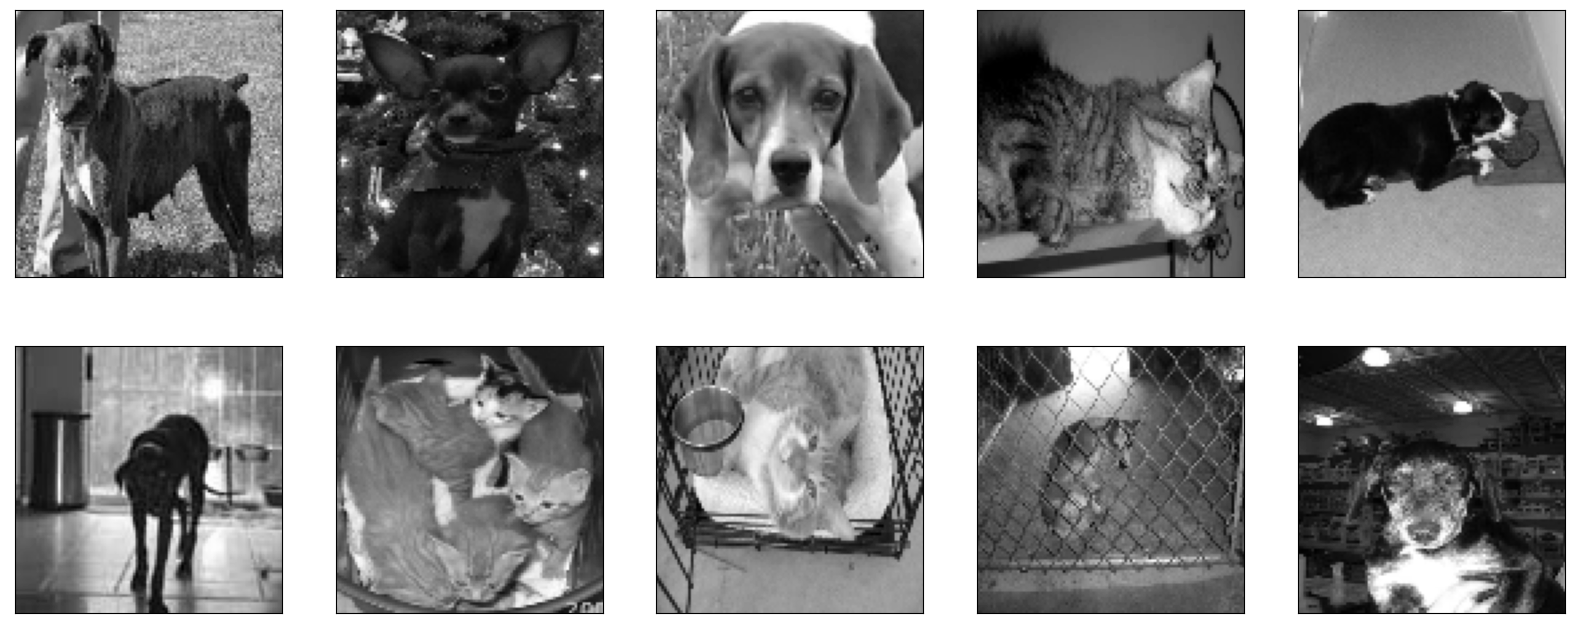

In [25]:
#ver las imagenes de la variable X sin modificaciones por aumento de datos
plt.figure(figsize=(20, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(100, 100), cmap="gray")

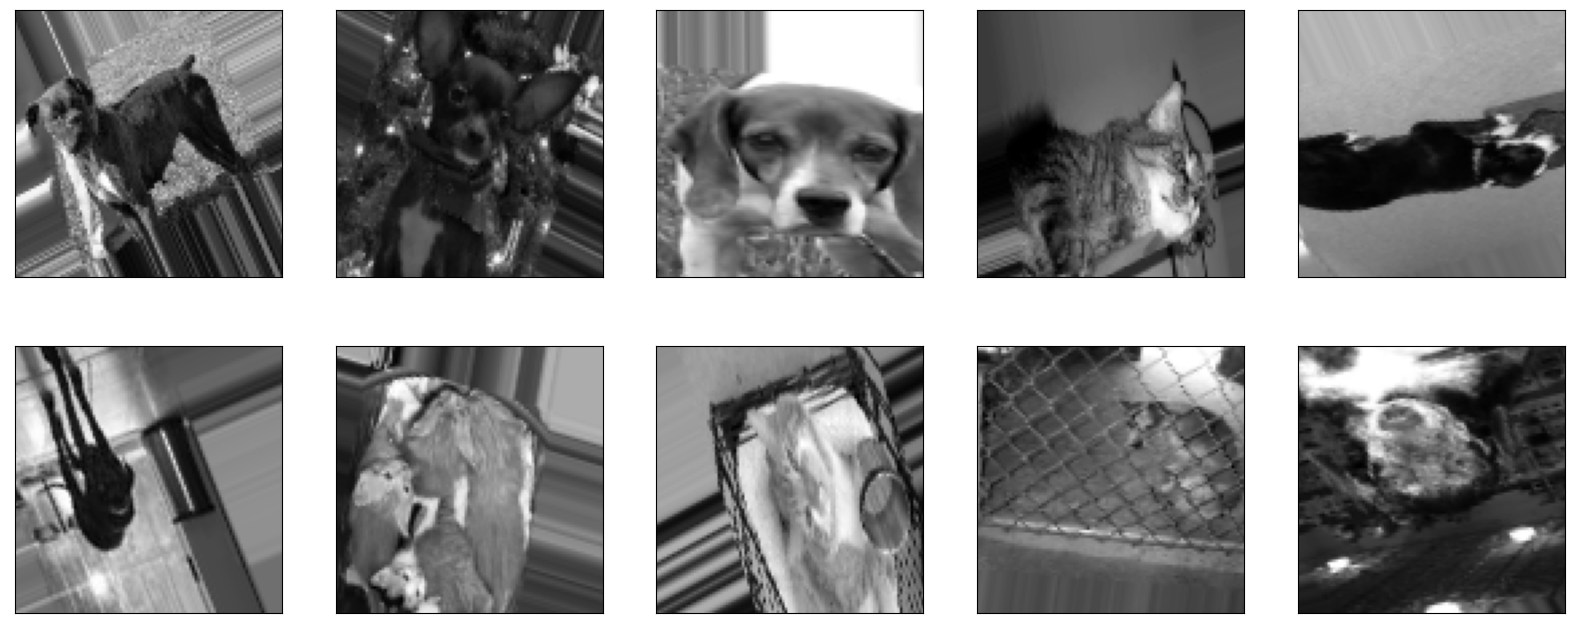

In [26]:
#Realizar el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [27]:
modeloDenso_AD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
modeloDenso_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [29]:
#Separar los datos de entrenamiento y los datos de pruebas en variables diferentes

len(X) * .85 #19700
len(X) - 19700 #3562

X_entrenamiento = X[:19700]
X_validacion = X[19700:]

y_entrenamiento = y[:19700]
y_validacion = y[19700:]

In [30]:
#Usar la funcion flow del generador para crear un iterador que podamos enviar como entrenamiento a la funcion FIT del modelo
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [31]:
tensorboardDenso_AD = TensorBoard(log_dir='logs/denso_AD')

modeloDenso_AD.fit(
    data_gen_entrenamiento,
    epochs=25, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardDenso_AD]
)

Epoch 1/25
616/616 [==============================] - 18s 29ms/step - loss: 0.7347 - accuracy: 0.5080 - val_loss: 0.6912 - val_accuracy: 0.5022
Epoch 2/25
616/616 [==============================] - 18s 29ms/step - loss: 0.6933 - accuracy: 0.5025 - val_loss: 0.6924 - val_accuracy: 0.5157
Epoch 3/25
616/616 [==============================] - 18s 29ms/step - loss: 0.6935 - accuracy: 0.5053 - val_loss: 0.6926 - val_accuracy: 0.5073
Epoch 4/25
616/616 [==============================] - 18s 29ms/step - loss: 0.6926 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.4986
Epoch 5/25
616/616 [==============================] - 18s 29ms/step - loss: 0.6928 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/25
616/616 [==============================] - 18s 29ms/step - loss: 0.6925 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.4997
Epoch 7/25
616/616 [==============================] - 18s 29ms/step - loss: 0.6922 - accuracy: 0.5056 - val_loss: 0.6925 - val_accuracy:

In [32]:
tensorboardCNN_AD = TensorBoard(log_dir='logs-new/cnn_AD')

modeloCNN_AD.fit(
    data_gen_entrenamiento,
    epochs=40, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN_AD]
)

Epoch 1/40
616/616 [==============================] - 79s 127ms/step - loss: 0.6814 - accuracy: 0.5603 - val_loss: 0.6784 - val_accuracy: 0.5758
Epoch 2/40
616/616 [==============================] - 78s 126ms/step - loss: 0.6583 - accuracy: 0.6110 - val_loss: 0.6997 - val_accuracy: 0.5924
Epoch 3/40
616/616 [==============================] - 78s 126ms/step - loss: 0.6465 - accuracy: 0.6260 - val_loss: 0.6184 - val_accuracy: 0.6623
Epoch 4/40
616/616 [==============================] - 78s 127ms/step - loss: 0.6315 - accuracy: 0.6419 - val_loss: 0.6370 - val_accuracy: 0.6364
Epoch 5/40
616/616 [==============================] - 78s 127ms/step - loss: 0.6244 - accuracy: 0.6534 - val_loss: 0.5794 - val_accuracy: 0.6909
Epoch 6/40
616/616 [==============================] - 76s 124ms/step - loss: 0.6073 - accuracy: 0.6655 - val_loss: 0.5889 - val_accuracy: 0.6746
Epoch 7/40
616/616 [==============================] - 73s 118ms/step - loss: 0.5889 - accuracy: 0.6863 - val_loss: 0.5307 - val_ac

In [33]:
tensorboardCNN2_AD = TensorBoard(log_dir='logs/cnn2_AD')

modeloCNN2_AD.fit(
    data_gen_entrenamiento,
    epochs=40, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN2_AD]
)

Epoch 1/40
616/616 [==============================] - 82s 132ms/step - loss: 0.6854 - accuracy: 0.5512 - val_loss: 0.6727 - val_accuracy: 0.6157
Epoch 2/40
616/616 [==============================] - 81s 131ms/step - loss: 0.6711 - accuracy: 0.5904 - val_loss: 0.6419 - val_accuracy: 0.6255
Epoch 3/40
616/616 [==============================] - 81s 132ms/step - loss: 0.6574 - accuracy: 0.6110 - val_loss: 0.6531 - val_accuracy: 0.6154
Epoch 4/40
616/616 [==============================] - 81s 132ms/step - loss: 0.6398 - accuracy: 0.6312 - val_loss: 0.6183 - val_accuracy: 0.6637
Epoch 5/40
616/616 [==============================] - 81s 132ms/step - loss: 0.6301 - accuracy: 0.6465 - val_loss: 0.5815 - val_accuracy: 0.7024
Epoch 6/40
616/616 [==============================] - 81s 132ms/step - loss: 0.6193 - accuracy: 0.6586 - val_loss: 0.6123 - val_accuracy: 0.6463
Epoch 7/40
616/616 [==============================] - 81s 132ms/step - loss: 0.6052 - accuracy: 0.6732 - val_loss: 0.5612 - val_ac

In [35]:
modeloDenso.save('perros-gatos-denso_V3.h5')
modeloDenso_AD.save('perros-gatos-denso-ad_V3.h5')

modeloCNN_AD.save('perros-gatos-cnn-ad_V3.h5')
modeloCNN.save('perros-gatos-cnn_V3.h5')

modeloCNN2_AD.save('perros-gatos-cnn2-ad_V3.h5')
modeloCNN2.save('perros-gatos-cnn2_V3.h5')

In [186]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 9060), started 1:30:21 ago. (Use '!kill 9060' to kill it.)

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
#from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#ModelF= load_model('perros-gatos-cnn_V1.h5')
ModelF= load_model('perros-gatos-cnn-ad_V3.h5')

1/1 [==============================] - 0s 17ms/step
retorno de la predicción =  [2.3163296e-17]
 ** ES GATO  **


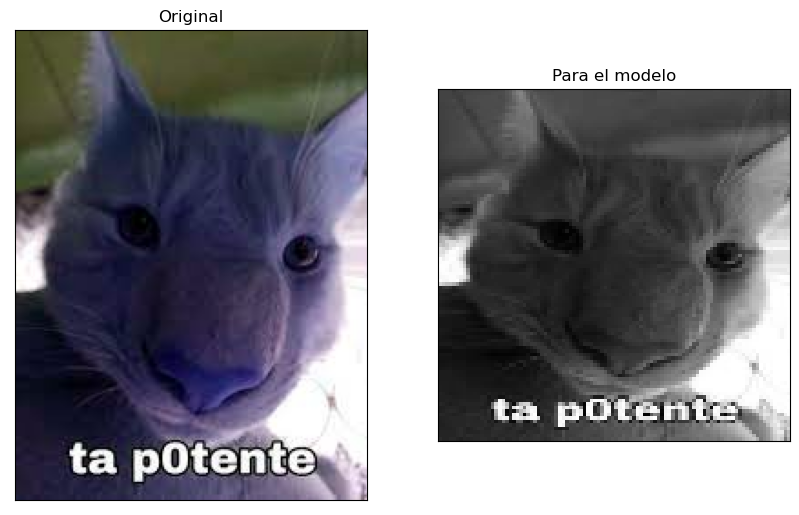

In [25]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image
import keras
import tensorflow as tf

#uploaded = files.upload()
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(10,10))
imagen = cv2.imread('ImgPre/gat15.jpg') 
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(imagen, cmap='gray')
plt.title("Original")


TAMANO_IMG=100

imagen = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(imagen, cmap='gray')
plt.title("Para el modelo")

 
  # predicting images
img=imagen
  #img = keras.utils.load_img(path, target_size=(100, 100))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = ModelF.predict(images, batch_size=10)
print("retorno de la predicción = ",classes[0])
if classes[0]>0.5:
    print(" ** ES PERRO  **")
else:
    print(" ** ES GATO  **")